## <font color="maroon"><h4 align="center">Pandas Group By</font>

**In this tutorial we are going to look at weather data from various cities and see how group by can be used to run some analytics.** 

In [1]:
import pandas as pd
df = pd.read_csv("/content/sample_data/weather_by_cities.csv")
df

,day,city,temperature,windspeed,event
0,1/1/2017,new york,32,6,Rain
1,1/2/2017,new york,36,7,Sunny
2,1/3/2017,new york,28,12,Snow
3,1/4/2017,new york,33,7,Sunny
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain
8,1/1/2017,paris,45,20,Sunny
9,1/2/2017,paris,50,13,Cloudy


### For this dataset, get following answers,
#### 1. What was the maximum temperature in each of these 3 cities?
#### 2. What was the average windspeed in each of these 3 cities?


In [3]:
new_df = df.groupby("city")
new_df  # this new_df will now be a object

**DataFrameGroupBy object looks something like below,**

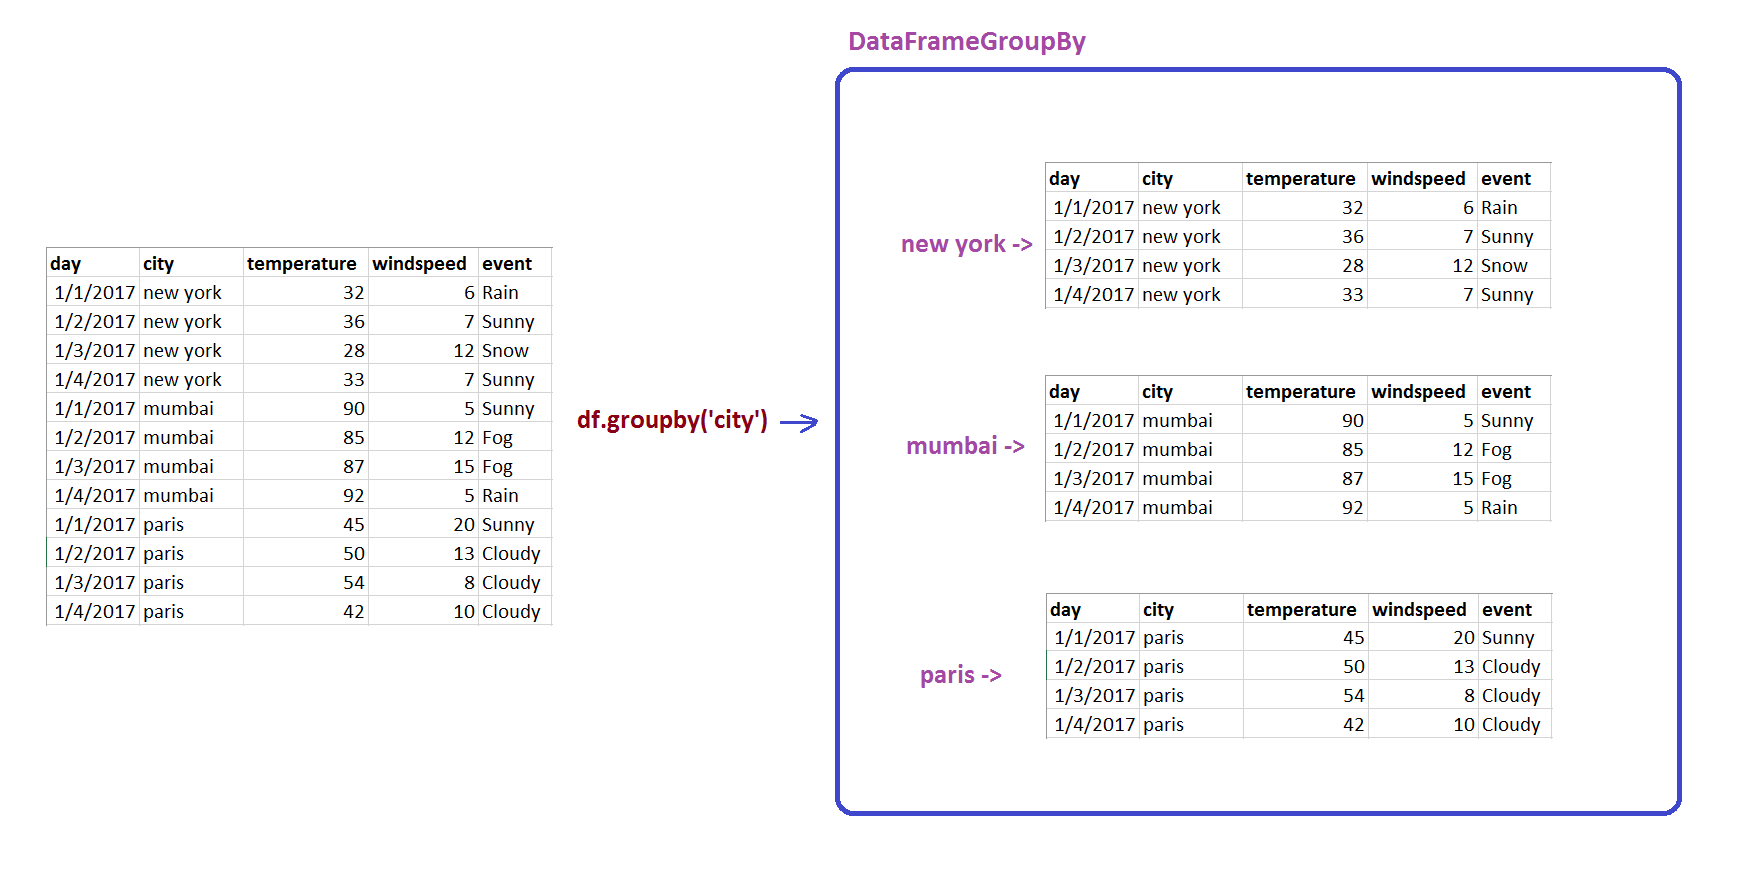

In [10]:
# the object will have different frames and will store grouping headers in one part and its corresponding date in other part
for x,y in new_df: 
    print("City and the data : ")
    print("City:",x)
    print("data:",y)    
    print("\n---------\n")

City and the data : 
City: mumbai
data:         day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
7  1/4/2017  mumbai           92          5   Rain

---------

City and the data : 
City: new york
data:         day      city  temperature  windspeed  event
0  1/1/2017  new york           32          6   Rain
1  1/2/2017  new york           36          7  Sunny
2  1/3/2017  new york           28         12   Snow
3  1/4/2017  new york           33          7  Sunny

---------

City and the data : 
City: paris
data:          day   city  temperature  windspeed   event
8   1/1/2017  paris           45         20   Sunny
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
11  1/4/2017  paris           42         10  Cloudy

---------



**This is similar to SQL,**

**SELECT * from weather_data GROUP BY city**

In [11]:
new_df.get_group('mumbai')  # getting the particular group

,day,city,temperature,windspeed,event
4,1/1/2017,mumbai,90,5,Sunny
5,1/2/2017,mumbai,85,12,Fog
6,1/3/2017,mumbai,87,15,Fog
7,1/4/2017,mumbai,92,5,Rain


Now get the maximum, minimum, average from the group

In [12]:
new_df.max() # will display the cities in the alphabetic order ... only the numeric value fields will be displayed

,day,temperature,windspeed,event
city,,,,
mumbai,1/4/2017,92,15,Sunny
new york,1/4/2017,36,12,Sunny
paris,1/4/2017,54,20,Sunny


In [16]:
new_df.average()  # ERROR --------  there is no method average so we check for other things

AttributeError: ignored

In [14]:
new_df.mean()

<ipython-input-14-b697eb9e3f41>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  new_df.mean()


,temperature,windspeed
city,,
mumbai,88.50,9.25
new york,32.25,8.00
paris,47.75,12.75


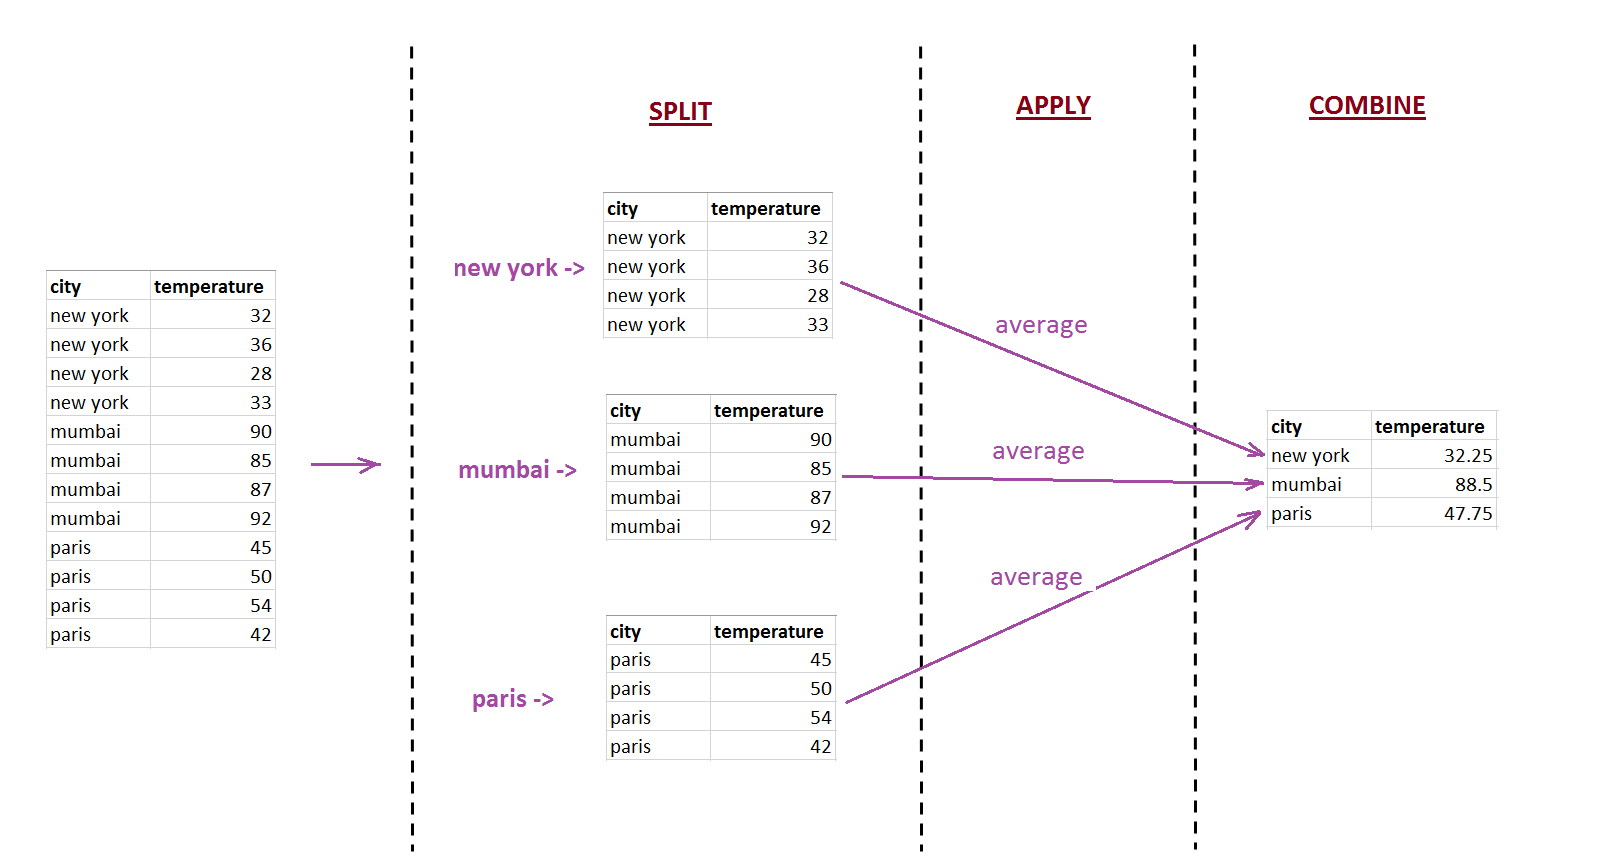

**This method of splitting your dataset in smaller groups and then applying an operation 
(such as min or max) to get aggregate result is called Split-Apply-Combine. It is illustrated in a diagram below**

In [17]:
new_df.min()

,day,temperature,windspeed,event
city,,,,
mumbai,1/1/2017,85,5,Fog
new york,1/1/2017,28,6,Rain
paris,1/1/2017,42,8,Cloudy


In [21]:
df.describe()

,temperature,windspeed
count,12.000000,12.000000
mean,56.166667,10.000000
std,25.044808,4.572646
min,28.000000,5.000000
25%,35.250000,6.750000
50%,47.500000,9.000000
75%,85.500000,12.250000
max,92.000000,20.000000


**25% of the data have the values equal to 35.25 or less than 35.25**

**50% of the data have the values equal to 47.5 or less than 47.5**

In [20]:
new_df.describe() # the analytics of the numerical values

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [22]:
new_df.size()

city
mumbai      4
new york    4
paris       4
dtype: int64

In [23]:
new_df.count()

,day,temperature,windspeed,event
city,,,,
mumbai,4,4,4,4
new york,4,4,4,4
paris,4,4,4,4


city
mumbai      Axes(0.125,0.11;0.775x0.77)
new york    Axes(0.125,0.11;0.775x0.77)
paris       Axes(0.125,0.11;0.775x0.77)
dtype: object

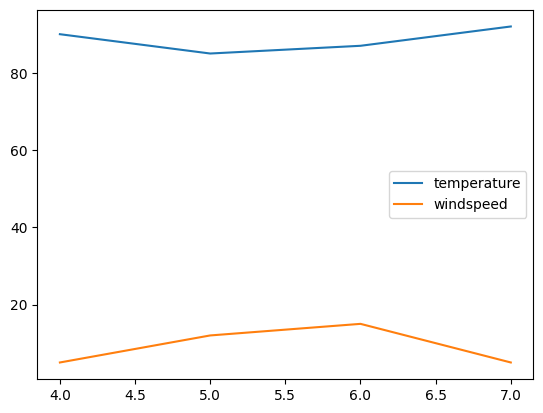

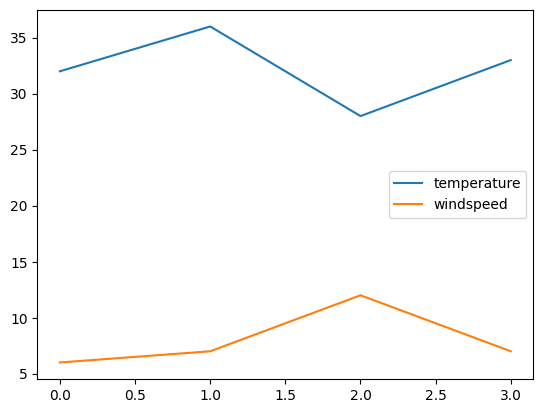

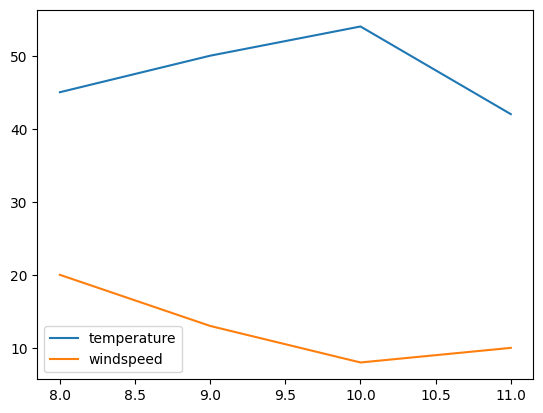

In [24]:
%matplotlib inline
new_df.plot()  # 3 different charts for 3 different cities

<h4>Group data using custom function: Let's say you want to group your data using custom function. Here the requirement is to create three groups<h4>
<ol>
    <li>Days when temperature was between 80 and 90</li>
    <li>Days when it was between 50 and 60</li>
    <li>Days when it was anything else</li>
</ol>

For this you need to write custom grouping function and pass that to groupby

In [29]:
def grouper(df, col ,idx):
    if 80 <= df[col].loc[idx] <= 90:
        return '80-90'
    elif 50 <= df[col].loc[idx] <= 60:
        return '50-60'
    else:
        return 'others'

In [30]:
new_df = df.groupby(lambda x: grouper(df, 'temperature',x))
new_df

In [34]:
for x, y in new_df:
    print("Group by temperature when values are between : {}\n".format(x))
    print(y)
    print("--------------------------------------------------")

Group by temperature when values are between : 50-60

         day   city  temperature  windspeed   event
9   1/2/2017  paris           50         13  Cloudy
10  1/3/2017  paris           54          8  Cloudy
--------------------------------------------------
Group by temperature when values are between : 80-90

        day    city  temperature  windspeed  event
4  1/1/2017  mumbai           90          5  Sunny
5  1/2/2017  mumbai           85         12    Fog
6  1/3/2017  mumbai           87         15    Fog
--------------------------------------------------
Group by temperature when values are between : others

         day      city  temperature  windspeed   event
0   1/1/2017  new york           32          6    Rain
1   1/2/2017  new york           36          7   Sunny
2   1/3/2017  new york           28         12    Snow
3   1/4/2017  new york           33          7   Sunny
7   1/4/2017    mumbai           92          5    Rain
8   1/1/2017     paris           45         2